In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# interactive in notebook
%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D
import pylab

### other module
from util_tsne import *

Automatically created module for IPython interactive environment


### training kernels

In [2]:
training_kernels = [[0.881481481,2.587229,0.907526,0,0.35,0.6005,4.322245],
[0.495752896,1.257769,0.721808,0,0.1,0.3069,1.658795],
[0.424892966,2.00134,0.98219,0,0.15,0.3513,1.958961],
[0.105555556,0.17028,0.116339,0,0.05,0.0401,0.165949],
[0.045238095,1.784725,0.854031,0,0.4,0.4464,3.497565],
[0.032925682,1.702509,0.990866,0,0.15,0.3404,2.33181],
[0.002206736,3.322614,0.699366,0,0.45,0.83,9.698005]]

training_kernels = np.array(training_kernels)

print training_kernels.shape

(7, 7)


### best block size for trainig kernels

In [3]:
# training kernel: best block size 
y =[256,
256,
256,
128,
128,
256,
768]

y_name = [
"transDiag",
"shflvert",
"matrixMul",
"padKernel",
"paddataclamp",
"stereoDisp",
"quasirandomGen"   
]


print len(y)
# y = np.array(y)
#print y.shape

7


### Prepare data

In [4]:
mykern = [[0.915384615,0.352684,0.124273,0,0.1,0.0722,0.307958]]

mykern = np.array(mykern)
#print em_gammaobs.shape

X = training_kernels
X = np.append(X, mykern, axis=0)

print X.shape

(8, 7)


In [5]:
#X

### tsne-3d

In [6]:
tsne3d = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne3d.fit_transform(X)

In [7]:
X_tsne

array([[ -77.49666293,  -50.90302454,   82.27056907],
       [-423.50780534,  336.16351517,  183.4935239 ],
       [ -49.11722391, -617.67363594,  282.29416031],
       [   7.75145069,   76.53838756, -330.66310885],
       [  91.48839926,   86.58082422,    1.85706766],
       [ 318.58171899,  275.38968677, -448.53455959],
       [  -3.44001549,   26.15924084,  -90.85760551],
       [ 137.37609462, -130.23864639,  315.27331841]])

In [8]:
print tsne3d.kl_divergence_
#tsne.get_params

-3.71395087242


In [9]:
top3rows, top3bs = predit_bs_tsne(X_tsne, y)

input X dims : 8 x 3
row 0 : dist=326.733414315
row 1 : dist=741.274335031
row 2 : dist=522.934270975
row 3 : dist=690.502105826
row 4 : dist=383.856886944
row 5 : dist=883.613205806
row 6 : dist=457.418630321
Top 3 distance : 326.733414315 , 383.856886944 ,457.418630321
Top 3 rows : 0 , 4 ,6
Top 3 ranking : 256 , 128 ,768


### visualize data

<IPython.core.display.Javascript object>


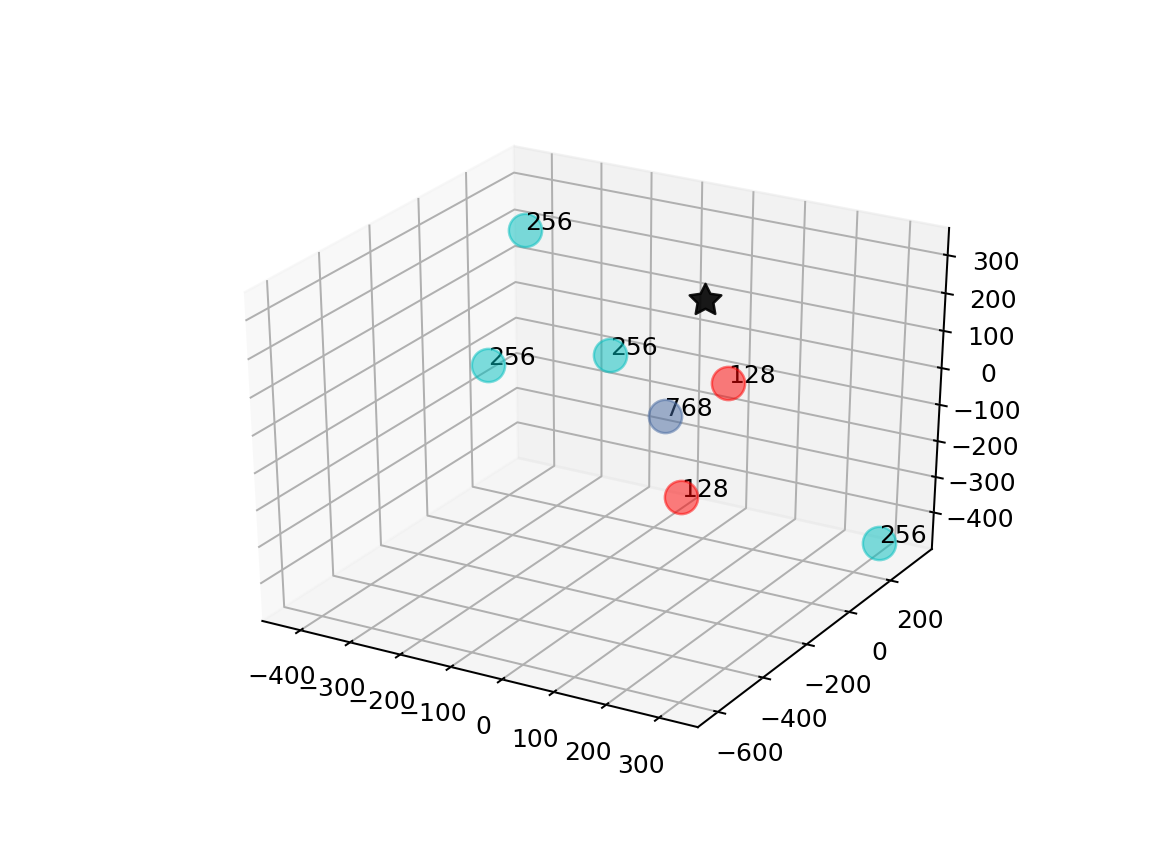

In [10]:
plot_tsne_3d(X_tsne, y)


### tsne-2d

In [11]:
tsne2d = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne_2d = tsne2d.fit_transform(X)

print X_tsne_2d
print X_tsne_2d.shape

[[  28.87451005  -15.96765808]
 [-147.94934548  190.5061846 ]
 [  -9.15587568 -193.8014062 ]
 [  41.86363576  152.31055587]
 [-111.13774486   44.52510175]
 [ 191.22989245   51.73293352]
 [-147.1069528  -102.43289202]
 [ 148.02506934 -123.313249  ]]
(8, 2)


In [12]:
top3rows, top3bs = predit_bs_tsne(X_tsne_2d, y)

input X dims : 8 x 2
row 0 : dist=160.374348542
row 1 : dist=431.373957417
row 2 : dist=172.262676698
row 3 : dist=295.362035126
row 4 : dist=308.763787136
row 5 : dist=180.299258892
row 6 : dist=295.86973452
Top 3 distance : 160.374348542 , 172.262676698 ,180.299258892
Top 3 rows : 0 , 2 ,5
Top 3 ranking : 256 , 256 ,256


<IPython.core.display.Javascript object>


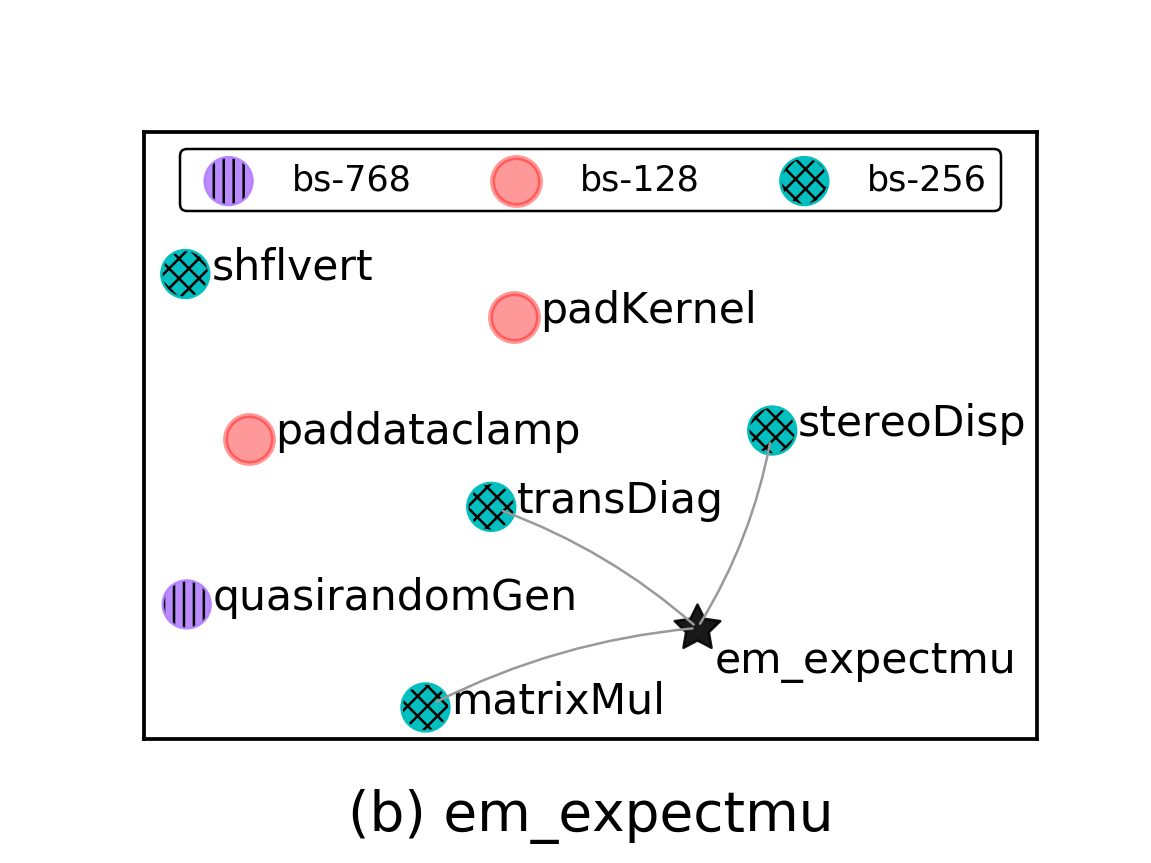

-171.799856798 215.080403774
-221.672620566 218.377398971


/Users/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1292: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/Users/leiming/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1297: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


In [13]:
#plot_tsne_2d(X_tsne_2d, y, top3rows)

#plot_tsne_2d_v1(X_tsne_2d, y, y_name, top3rows)


plot_tsne_2d_v2(X_tsne_2d, y, y_name, top3rows, figname='tsne_hmm_expectmu', kernelname='em_expectmu',
               xtitle='(b) em_expectmu')